In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("../data/titanic_train.csv")
df_test = pd.read_csv("../data/titanic_test.csv")
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [2]:
print(df_train.info())
print("------------------------")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     3

In [4]:
#age,cabin,body,home.dest에 결측치 있는걸 알 수 있음
#name,ticket/(분석 당장 x)/ body,home.dest가/ (리얼 의미 x) 의미없는 변수일거라고 판단해서 지워버리기

In [81]:
df_train = df_train.drop(["name","ticket","cabin","body","home.dest"],axis=1)
df_test = df_test.drop(["name","ticket","body","cabin","home.dest"],axis=1)

0    563
1    353
Name: survived, dtype: int64


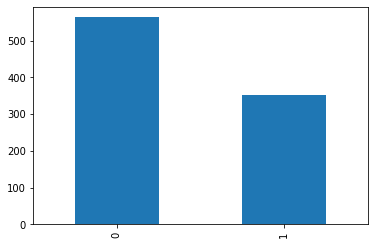

In [8]:
print(df_train["survived"].value_counts())
df_train["survived"].value_counts().plot.bar()

0    563
1    353
Name: survived, dtype: int64


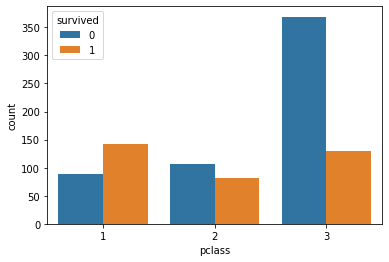

In [9]:
#각피처에 대한 탐색진행-우선 가장 영향력 있을거 같은 pclass
print(df_train["survived"].value_counts())
ax = sns.countplot(x="pclass",hue="survived",data=df_train)

In [19]:
#수치형 피처들에 대한 탐석 
#두 그룹간의 분표 피교, 표준편차. t-test.shapiro-wilk test

from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [23]:
def valid_features(df, col_name, distribution_check=True):
    
    # 두 집단 (survived=1, survived=0)의 분포 그래프를 출력
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)

    # 두 집단 표준편차 출력
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    
     # T-test로 두 집단의 평균 차이검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)
    
    #Shapiro Wilk: 분포 정규성 검정
    if distribution_check:
     
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000
data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015


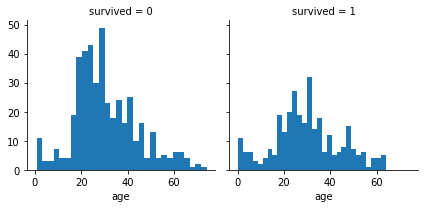

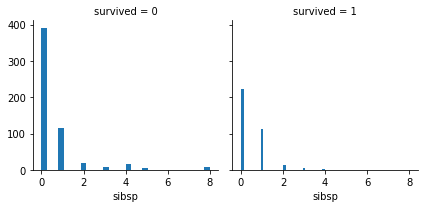

In [25]:
#age와 feature 변수 탐색
valid_features(df_train[df_train['age'] > 0], "age",distribution_check = True)
valid_features(df_train, "sibsp", distribution_check=False)


In [27]:
#sibsp는 두 그룹간의 평균차이가 있다는 것을 알 수 있음

data std is 0.74
data std is 0.89
The t-statistic and p-value assuming equal variances is 1.865 and 0.063.
The t-statistic and p-value not assuming equal variances is 1.942 and 0.052
The w-statistic and p-value in Survived 0.630 and 0.000
The w-statistic and p-value in Non-Survived 0.421 and 0.000
data std is 60.68
data std is 33.65
The t-statistic and p-value assuming equal variances is 7.523 and 0.000.
The t-statistic and p-value not assuming equal variances is 6.657 and 0.000
The w-statistic and p-value in Survived 0.660 and 0.000
The w-statistic and p-value in Non-Survived 0.520 and 0.000


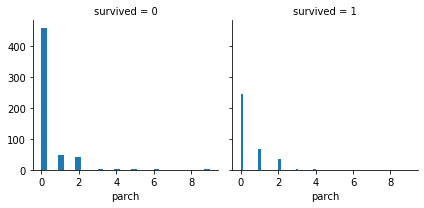

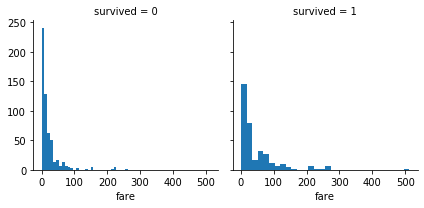

In [32]:
#미니퀴즈 4-1: parch,fare변수 탐색
valid_features(df_train,"parch",distribution_check=True)
valid_features(df_train,"fare",distribution_check=True)

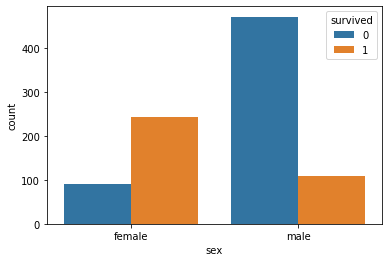

In [45]:
#미니퀴즈 4-1: sex,embarked 변수 탐색
ax_sex = sns.countplot(x = "sex", hue="survived",data=df_train)
#성별별로 차이있음

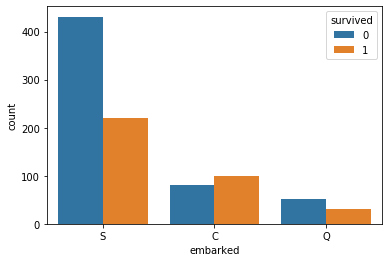

In [46]:
ax_embarked = sns.countplot(x = "embarked",hue="survived",data=df_train)
#배 별로 차이 있음

In [82]:
#step2: 생존자 모델 만들기
 #결측값 전처리 하기 
    #age 결측값을 평균값으로 대체하기

replace_mean = df_train[df_train["age"] > 0]["age"].mean()
df_train["age"] = df_train["age"].fillna(replace_mean)
df_test["age"] = df_test["age"].fillna(replace_mean)

In [83]:
#embark: 2개의 결측값을 최빈값으로 대체
embark_mode = df_train["embarked"].value_counts().index[0]
df_train["embarked"] = df_train["embarked"].fillna(embark_mode)
df_test["embarked"] = df_test["embarked"].fillna(embark_mode)


In [84]:
#원-핫 인코딩하기 위해서 통합 df만들기
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

#pandas에서 원핫인코딩
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head(5)

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [85]:
#sklearn 모듈에서 Logistic Regression 모델로 학습하기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [88]:
#데이터를 학습 데이터셋, 테스트 데이터셋으로 분리하기
x_train , y_train = df_train.loc[:, df_train.columns != "survived"].values, df_train["survived"].values
x_test, y_test = df_test.loc[:,df_test.columns != "survived"].values, df_test["survived"].values

#로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

#학습한 모델의 테스트 데이터셋에 대한 예측 결과
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

In [90]:
#테스트 데이터셋 평가하기
print("accuracy: %.2f" % accuracy_score(y_test,y_pred))
print('Preicision: %.2f' % precision_score(y_test,y_pred))
print("Recall; %.2f " % recall_score(y_test,y_pred))
print("F1: %3.f" % f1_score(y_test,y_pred) )

accuracy: 0.80
Preicision: 0.76
Recall; 0.67 
F1:   1


In [91]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

#AUC 계산하여 출력하기
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %3.f" %roc_auc)

AUC :   1


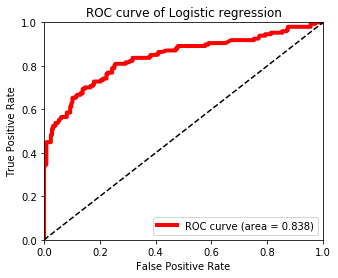

In [94]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

In [95]:
#의사결정나무 학습하기
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

#모델 성능 계산해서 출력
print("accuracy: %.2f" % accuracy_score(y_test,y_pred))
print("Precision : %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test,y_pred))
print("F1: %3.f" % f1_score(y_test,y_pred))

#학습한 모델 AUC계산해서 출력
false_positive_rate , true_positive_rate,thresholds = roc_curve(y_test,y_pred_probability)
roc_auc = roc_auc_score(y_test,y_pred_probability)
print("AUC :%3.f" % roc_auc)

accuracy: 0.74
Precision : 0.667
Recall: 0.626
F1:   1
AUC :  1


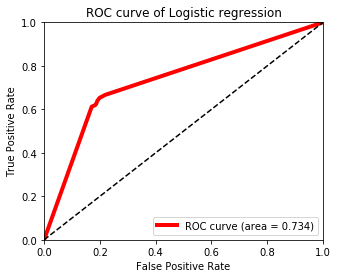

In [96]:
#그래프 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

In [146]:
#step3: 모델개선 => 피쳐 엔지니어링 첫걸음!ㅁ!
df_train = pd.read_csv("../data/titanic_train.csv")
df_test = pd.read_csv("../data/titanic_test.csv")
df_train = df_train.drop(["ticket","body","home.dest"],axis=1)
df_test = df_test.drop(["ticket","body","home.dest"],axis=1)

In [147]:
#age의 결측값: 평균값으로 대체하기
replace_mean = df_train[df_train["age"] > 0]["age"].mean()
df_train["age"] = df_train["age"].fillna(replace_mean)
df_test["age"] = df_test["age"].fillna(replace_mean)
#embark의 결측값: 최빈값으로 대체하기
embark_mode = df_train["embarked"].value_counts().index[0]
df_train["embarked"] = df_train["embarked"].fillna(embark_mode)
df_test["embarked"] = df_test["embarked"].fillna(embark_mode)
#원핫코딩위해서 통합 데이터 생성하기
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

whole_df["cabin"].value_counts()[:10]

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
F33                4
C22 C26            4
F4                 4
C78                4
B96 B98            4
D                  4
Name: cabin, dtype: int64

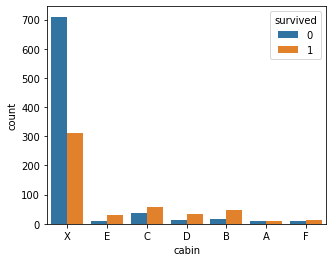

In [148]:
#결측데이터와 데이터수가 매우 적은 G,T는 X로 대체하기
    #결측데이터의 경우 X로 대체
whole_df["cabin"] = whole_df["cabin"].fillna("X")
    #cabin의 알파벳 앞에만 추출하기
whole_df["cabin"] = whole_df["cabin"].apply(lambda x: x[0])
    #G,T는 X로 대체하기
whole_df["cabin"] = whole_df["cabin"].replace({"G":"X","T":"X"})

ax = sns.countplot(x="cabin",hue="survived",data=whole_df)
plt.show()

In [149]:
#name피쳐 가공하기
    #이름에서 호칭 추출하기
name_grade = whole_df['name'].apply(lambda x : x.split(", ")[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms', 'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Don', 'Capt']


In [150]:
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성
              'C': ['Jonkheer', 'the Countess'], # 귀족
              'D': ['Mr', 'Don'], # 남성
              'E': ['Master'], # 젊은남성
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성

def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'
    
# 위의 함수를 적용하여 name 피처를 새롭게 정의합니다.
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))
print(whole_df['name'].value_counts())

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64


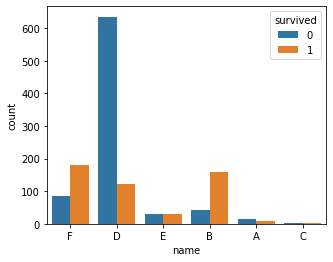

statistic = 341.971, pvalue = 0.000


In [160]:
#미니퀴즈 4-2
ax = sns.countplot(x="name",hue="survived",data= whole_df)
plt.show()
#상대적으로 여성이 살아남았음을 볼 수 있음
chis = stats.chisquare(whole_df[whole_df['survived']==1]['cabin'].value_counts().sort_index(), 
                       whole_df[whole_df['survived']==0]['cabin'].value_counts().sort_index())
print("statistic = %.3f, pvalue = %.3f" % chis)

In [163]:
#원핫인코딩하기
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Accuracy: 0.79
Precision: 0.74
Recall;   1
F1:0.718
AUC : 0.853


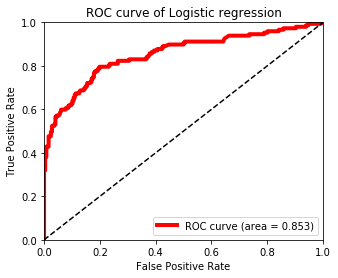

In [165]:
#피쳐 엔지니어링 후 데이터 학습 해보기
    #데이터셋 분리
x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

    #로지스틱 회귀모델 학습하기
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

    #testset예측하기
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

    #각각의 평가지표 출력하기
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))
print("Precision: %.2f" % precision_score(y_test,y_pred))
print("Recall; %3.f" % recall_score(y_test,y_pred))
print('F1:%.3f' % f1_score(y_test,y_pred))

    # AUC 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

    #그래프로 출력
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

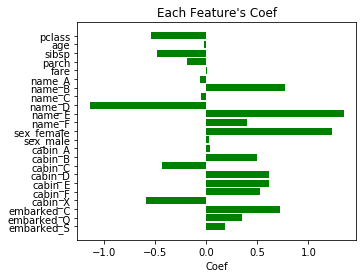

In [166]:
cols = df_train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")

plt.show()

In [177]:
#step4:모델 검증하기
from sklearn.model_selection import KFold

# K-fold 교차 검증
k = 5
cv = KFold(k, shuffle=True, random_state=0)
acc_history = []

for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values
    
    lr = LogisticRegression(random_state=0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    y_pred_probability = lr.predict_proba(splited_x_test)[:,1]
    
    splited_acc = accuracy_score(splited_y_test, y_pred)
    acc_history.append(splited_acc)

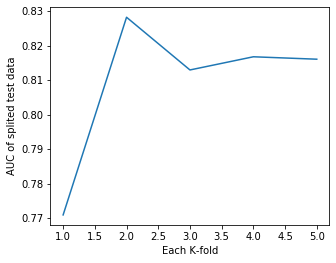

In [179]:
plt.xlabel("Each K-fold")
plt.ylabel("AUC of splited test data")
plt.plot(range(1,k+1),acc_history)

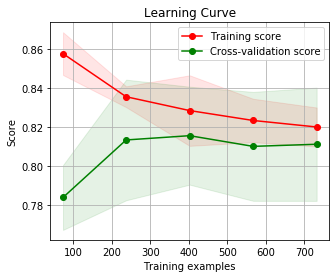

In [180]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()

In [ ]:
#이뜻은 sample data가 300개 이상되어야 과적합이 나아진다는 의미:)